## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [2]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned OFF


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

Size of original IMAGE (301, 222, 3)
Resized by nearest interpolation (75, 55, 3)
Resized by bilinear interpolation (60, 44, 3)
Resized by bicubic interpolation (45, 33, 3)


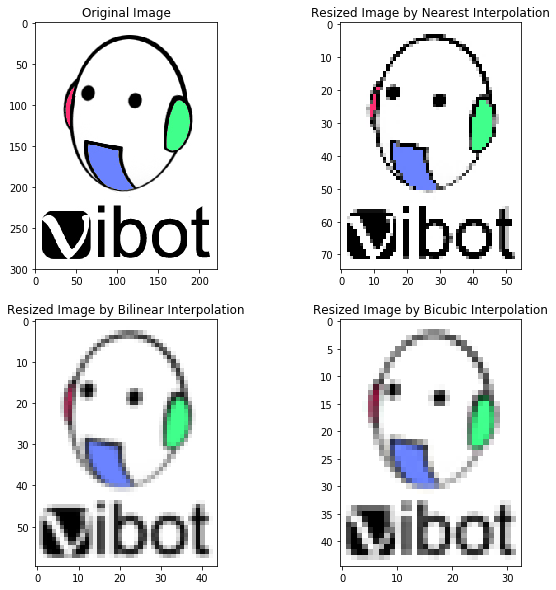

In [3]:
img_path = './images/'
img_name = 'vibot-color.jpg'
vibot_im = io.imread(img_path.__add__(img_name))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow(vibot_im)
ax0.set_title('Original Image')

resized_near_im = (misc.imresize(vibot_im, 25, interp='nearest', mode=None))
resized_bil_im = (misc.imresize(vibot_im, 20, interp='bilinear', mode=None))
resized_bic_im = (misc.imresize(vibot_im, 15, interp='bicubic', mode=None))

ax1.imshow(resized_near_im)
ax1.set_title('Resized Image by Nearest Interpolation')
ax2.imshow(resized_bil_im) 
ax2.set_title('Resized Image by Bilinear Interpolation')
ax3.imshow(resized_bic_im)
ax3.set_title('Resized Image by Bicubic Interpolation')


size_vibot_im = np.shape(vibot_im)
size_resized_bil = np.shape(resized_bil_im)
size_resized_near = np.shape(resized_near_im)
size_resized_bic = np.shape(resized_bic_im)

print('Size of original IMAGE',size_vibot_im)
print('Resized by nearest interpolation',size_resized_near)
print('Resized by bilinear interpolation',size_resized_bil)
print('Resized by bicubic interpolation',size_resized_bic)

**Q.2 Similar to the function of `my_blending.m` that you saw before define your function of blending ** 

**Therefore define three functions `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


In [ ]:
img_path = './images/'
img_name = 'apple.jpeg'
apple_im = io.imread(img_path.__add__(img_name), as_grey=1)
img_name1 = 'orange.jpeg'
orange_im = io.imread(img_path.__add__(img_name1), as_grey=1)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax0, ax1 = axes.ravel()

ax0.imshow(apple_im,cmap = cm.Greys_r)
ax0.set_title('Apple')
ax1.imshow(orange_im,cmap = cm.Greys_r)
ax1.set_title('Orange')

def simple_blend(img1, img2):
    im1 = np.copy(img1)
    im2 = np.copy(img2)
    wd = im1.shape[1]/2
    flwd = wd*2
    blend_im[:,0:int(wd)]=im1[:,0:int(wd)]
    blend_im[:,int(wd):int(flwd)]=im2[:,int(wd):int(flwd)]
    return blend_im;

def alpha_blend(img1, img2):
    im1 = np.copy(img1)
    im2 = np.copy(img2)
    row_im1, col_im1 = im1.shape
    row_im2, col_im2 = im2.shape
    wd=int (0.20*col_im1) 
    im1_spn = int(col_im1/2-wd/2)
    im2_spn = int(col_im2/2+wd/2)
    wd_spn = np.arange(im1_spn,im2_spn)
    alpha = (wd_spn/(im1_spn-im2_spn))-(im2_spn/(im1_spn-im2_spn))
    alpha_im = np.zeros(im1.shape)
    alpha_im[:,0:im1_spn] = im1[:,0:im1_spn]
    alpha_im[:,im2_spn:col_im2]=im2[:,im2_spn:col_im2]
    alpha_im[:,wd_spn]=alpha*im1[:,wd_spn]+(1-alpha)*im2[:,wd_spn]
    return alpha_im;

def pyramid_blend(img1, img2):
    im1 = np.copy(img1)
    im2 = np.copy(img2)
    row_im1, col_im1 = im1.shape
    row_im2, col_im2 = im2.shape
    wd=int (0.01*col_im1) 
    im1_spn = int(col_im1/2-wd/2)
    im2_spn = int(col_im2/2+wd/2)
    wd_spn = np.arange(im1_spn,im2_spn)
    pyramid_im1=np.zeros(im1.shape)
    pyramid_im1[:,1:int(col_im1/2) - wd] = 1
    pyramid_im1[:, im1_spn : im2_spn] = (wd_spn - im2_spn)/(im1_spn - im2_spn)
    im1_laplacian_Pyramid = list( transform.pyramid_laplacian(im1))
    im2_laplacian_Pyramid = list(transform.pyramid_laplacian(im2))
    blend = []
    for i in range(len(im2_laplacian_Pyramid)):
        t_im1 = im1_laplacian_Pyramid[i] * transform.resize(pyramid_im1, im1_laplacian_Pyramid[i].shape)
        t_im2 = im2_laplacian_Pyramid[i] * (1 - transform.resize(pyramid_im1,im2_laplacian_Pyramid[i].shape))
        blend.append( t_im1 + t_im2 )
    pyramid_im = blend[len(blend)-1]
    for i in range(len(blend)-1, 0, -1):
        pyramid_im = transform.resize(pyramid_im, blend[i-1].shape) + blend[i-1]
    return pyramid_im

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax0, ax1, ax2 = axes.ravel()

blend_im = simple_blend(apple_im, orange_im)
ax0.imshow(blend_im, cmap = cm.Greys_r)
ax0.set_title("Simple Blended Image")

blend_im2 = alpha_blend(apple_im, orange_im)
ax1.imshow(blend_im2, cmap = cm.Greys_r)
ax1.set_title("Alpha Blended Image")

blend_im3 = pyramid_blend(apple_im, orange_im)
ax2.imshow(blend_im3, cmap = cm.Greys_r)
ax2.set_title("Pyramid Blended Image")
